# Linear Regression in Python

เอกสารประกอบ<br>
https://towardsdatascience.com/introduction-to-linear-regression-in-python-c12a072bedf0

In [22]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

import mplcyberpunk
plt.style.use("cyberpunk")

# Generate 'random' data
np.random.seed(0)
X = 2.5 * np.random.randn(100) + 1.5   # Array of 100 values with mean = 1.5, stddev = 2.5
res = 0.5 * np.random.randn(100)       # Generate 100 residual terms
y = 2 + 0.3 * X + res                  # Actual values of Y

# Create pandas dataframe to store our X and y values
df = pd.DataFrame(
    {'X': X,
     'y': y}
)

# Show the first five rows of our dataframe
df.head()

X         y
0  5.910131  4.714615
1  2.500393  2.076238
2  3.946845  2.548811
3  7.102233  4.615368
4  6.168895  3.264107

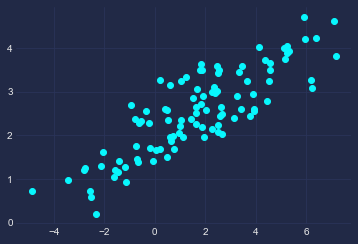

In [25]:
plt.scatter(X,y)

# Yₑ = α + β X

![title](lab33/lab33.png)

In [26]:
# Calculate the mean of X and y
xmean = np.mean(X)
ymean = np.mean(y)

# Calculate the terms needed for the numator and denominator of beta
df['xycov'] = (df['X'] - xmean) * (df['y'] - ymean)
df['xvar'] = (df['X'] - xmean)**2

# Calculate beta and alpha
beta = df['xycov'].sum() / df['xvar'].sum()

alpha = ymean - (beta * xmean)

print(f'alpha = {alpha}')
print(f'beta = {beta}')

alpha = 2.0031670124623426
beta = 0.3229396867092763


In [27]:
ypred = alpha + beta * X

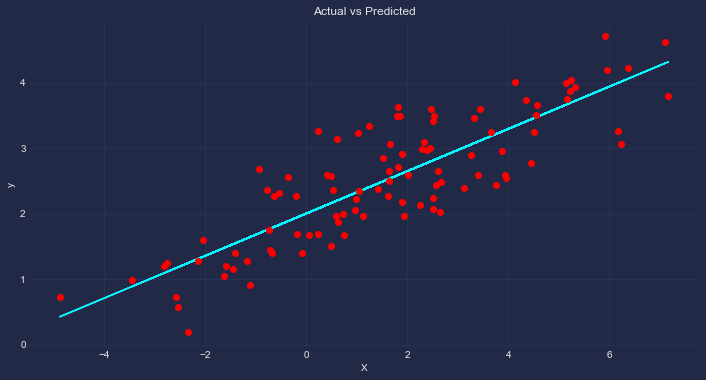

In [28]:
# Plot regression against actual data
plt.figure(figsize=(12, 6))
plt.plot(X, ypred)     # regression line
plt.plot(X, y, 'ro')   # scatter plot showing actual data
plt.title('Actual vs Predicted')
plt.xlabel('X')
plt.ylabel('y')

plt.show()

In [29]:
#For example, if we had a value X = 4, we can predict that:
alpha + (beta*(4))

3.294925759299448

# ตัวอย่าง :  วัวป่ากับสิงโต

In [30]:
df = pd.read_csv('datasources/predator_dataset.csv')
df.head(5)

Wildebeest   Zebra
0      118.00  124.00
1      106.00  105.00
2       79.31   75.23
3       67.45   78.50
4       57.83   76.16

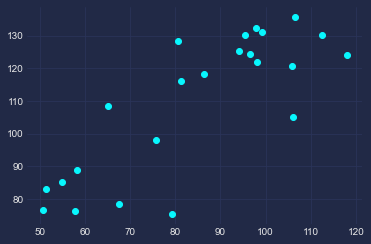

In [31]:
X = df['Wildebeest']
y = df['Zebra']
plt.scatter(X,y)

In [32]:
# Calculate the mean of X and y
xmean = np.mean(X)
ymean = np.mean(y)

# Calculate the terms needed for the numator and denominator of beta
df['xycov'] = (df['Wildebeest'] - xmean) * (df['Zebra'] - ymean)
df['xvar'] = (df['Wildebeest'] - xmean)**2

# Calculate beta and alpha
beta = df['xycov'].sum() / df['xvar'].sum()

alpha = ymean - (beta * xmean)

print(f'alpha = {alpha}')
print(f'beta = {beta}')

alpha = 38.50417610731145
beta = 0.8390868836262829


In [33]:
ypred = alpha + beta * X

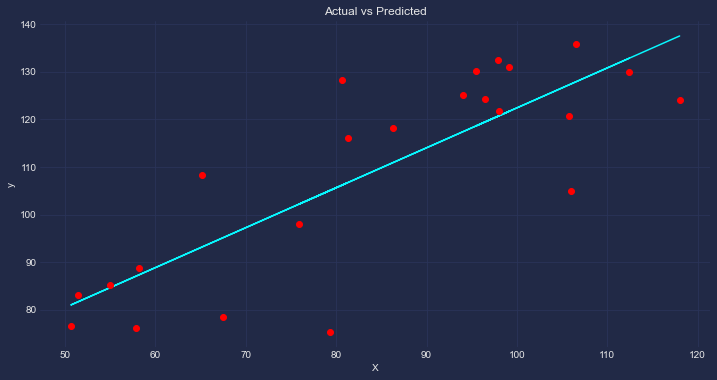

In [34]:
# Plot regression against actual data
plt.figure(figsize=(12, 6))
plt.plot(X, ypred)     # regression line
plt.plot(X, y, 'ro')   # scatter plot showing actual data
plt.title('Actual vs Predicted')
plt.xlabel('X')
plt.ylabel('y')

plt.show()

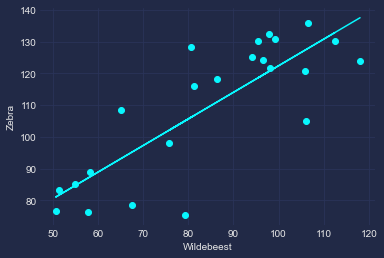

In [35]:
from scipy import stats
# ทดลองใช้ด้วย stats

x = df['Wildebeest']
y = df['Zebra']

slope, intercept, r, p, std_err = stats.linregress(x, y)  #from scipy import stats

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, x))

plt.scatter(x, y)
plt.plot(x, mymodel)
plt.xlabel("Wildebeest")
plt.ylabel("Zebra")
plt.show()